In [2]:
import numpy as np
import math as m
import matplotlib as mp
import scipy as sp
from scipy.integrate import quad
from matplotlib import pyplot as plt
from scipy.integrate import dblquad

-----------------------

# Stochastic Real Inflation

In [3]:
diff_cache1 = {}
diff_cache2 = {}
diff_cache3 = {}

In [4]:
r = 0.01
zy1=0.02
zy2=0.05
zy3=0.1
c=0.90

In [5]:
z1=(1+zy1)**(1/12)-1
z2=(1+zy2)**(1/12)-1
z3=(1+zy3)**(1/12)-1

In [6]:
r0=(1+r)**(1/12)-1

In [7]:
print(z1, z2, z3,r0)

0.0016515813019202241 0.0040741237836483535 0.007974140428903764 0.0008295381143461622


In [8]:
def S1(t):
    if t in diff_cache1:
        return diff_cache1[t]
    if t == 0:
        value = 0
    elif t >0:
        value = 1+S1(t-1)*(1+r0)-c*((1+z1)**t)
    diff_cache1[t] = value
    return value

In [9]:
def S2(t):
    if t in diff_cache2:
        return diff_cache2[t]
    if t == 0:
        value = 0
    elif t >0:
        value = 1+S2(t-1)*(1+r0)-c*((1+z2)**t)
    diff_cache2[t] = value
    return value

In [10]:
def S3(t):
    if t in diff_cache3:
        return diff_cache3[t]
    if t == 0:
        value = 0
    elif t >0:
        value = 1+S3(t-1)*(1+r0)-c*((1+z3)**t)
    diff_cache3[t] = value
    return value

In [11]:
S_1 = []
S_2 = []
S_3 = []
X_AX= []
S_0 = []
for i in range(0, 36):
    S_1.append(S1(i))
    S_2.append(S2(i))
    S_3.append(S3(i))
    X_AX.append(i)
    S_0.append(0)

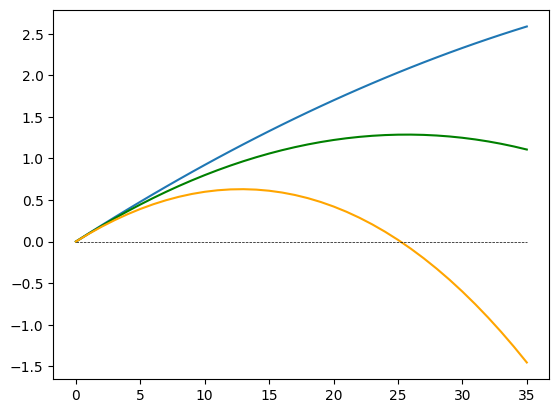

In [12]:
plt.plot(X_AX, S_1)
plt.plot(X_AX, S_2, color='green')
plt.plot(X_AX, S_3, color='orange')
plt.plot(X_AX, S_0, '--', color = 'black', linewidth = 0.5)

In [13]:
def IC(t,x):
    return c*(((((1+x)**t -1)*(1+x))/x)-t)

In [14]:
def IC_h(t,x):
    return IC(x,T)*1/160

In [15]:
IC_1 = []
IC_2 = []
IC_3 = []
for i in range(0, 36):
    IC_1.append(IC(i,z1))
    IC_2.append(IC(i,z2))
    IC_3.append(IC(i,z3))


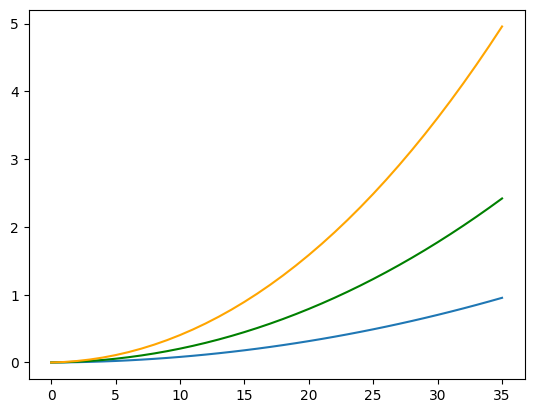

In [16]:
plt.plot(X_AX, IC_1)
plt.plot(X_AX, IC_2, color='green')
plt.plot(X_AX, IC_3, color='orange')